<a href="https://colab.research.google.com/github/ReemAlbluwi/Machine-Learning---T5/blob/main/Copy_of_PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**







#Step 1 : import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [ ]:
# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Print target names
print(data.target_names)

['class_0' 'class_1' 'class_2']


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [ ]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




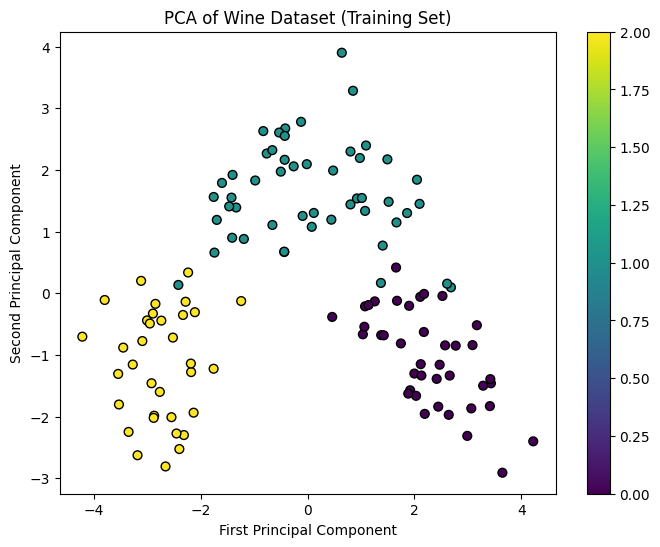

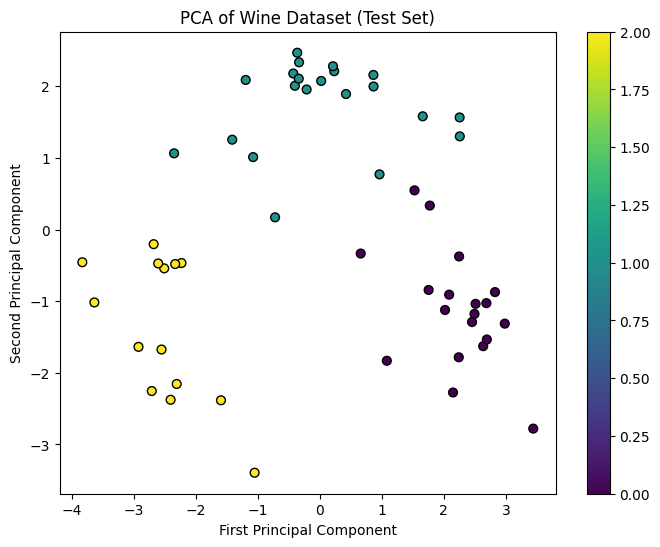

In [ ]:
# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualizing PCA results for the training set
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Wine Dataset (Training Set)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

# Visualizing PCA results for the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Wine Dataset (Test Set)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

#Step 6: Fitting Logistic Regression To the training set




In [ ]:
# Fitting Logistic Regression to the training set
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca, y_train)


LogisticRegression()

#Step 7: Predicting the test set result




In [ ]:
# Predicting the test set results
y_pred = logistic_regression.predict(X_test_pca)

#Step 8: Making the confusion matrix




In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9630
Precision: 0.9662
Recall: 0.9630
F1-score: 0.9628


#Step 9: Predicting the training set result




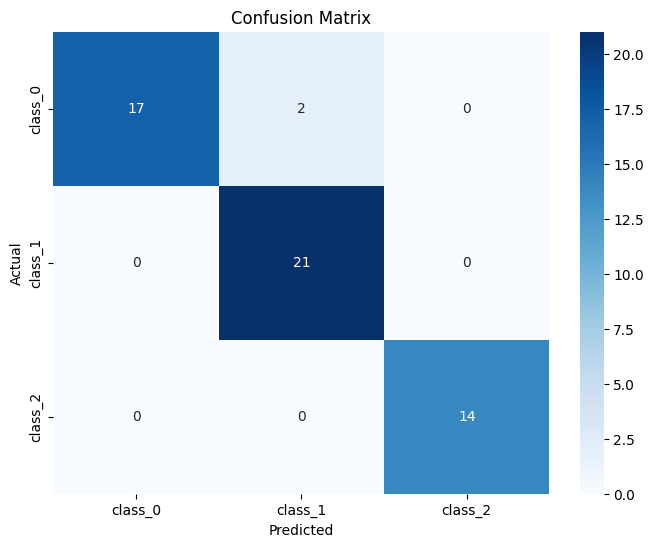

In [ ]:
# Making the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Step 10: Visualizing the Test set results




In [ ]:
# Predicting the training set results
y_train_pred = logistic_regression.predict(X_train_pca)

# Evaluating the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1-score: {train_f1:.4f}")

Training Accuracy: 0.9597
Training Precision: 0.9605
Training Recall: 0.9597
Training F1-score: 0.9595


<ipython-input-29-916805c92dfd>:4: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolor='r', alpha=0.5, s=40, marker='x', label='Predicted')


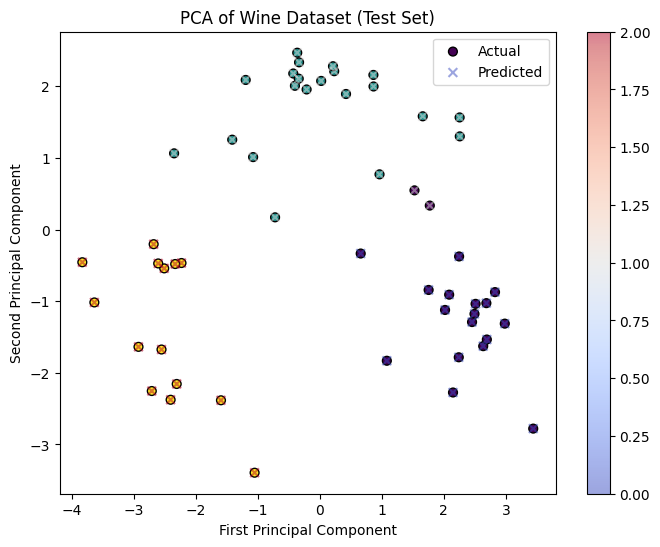

In [ ]:
# Visualizing the Test set results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=40, label='Actual')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolor='r', alpha=0.5, s=40, marker='x', label='Predicted')
plt.title('PCA of Wine Dataset (Test Set)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.colorbar()
plt.show()

#AUC

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, make_scorer

# Assuming X_train and y_train are your training data and labels
# Replace X_train and y_train with your actual training data

# Binarize the output
n_classes = len(np.unique(y_train))
y_train_binarized = label_binarize(y_train, classes=np.arange(n_classes))

# Initialize OneVsRestClassifier with LogisticRegression
model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))

# Define a scoring function to handle multiclass AUC
def multiclass_roc_auc_score(y_true, y_pred, average="macro"):
    return roc_auc_score(y_true, y_pred, average=average)

# Perform cross-validation with custom scoring function
scores = cross_val_score(model, X_train, y_train_binarized, cv=5, scoring=make_scorer(multiclass_roc_auc_score))

print(f'Cross-Validation AUC Scores: {scores}')
print(f'Mean AUC Score: {scores.mean()}')


Cross-Validation AUC Scores: [0.98958333 0.99166667 1.         0.98958333 0.99074074]
Mean AUC Score: 0.9923148148148149


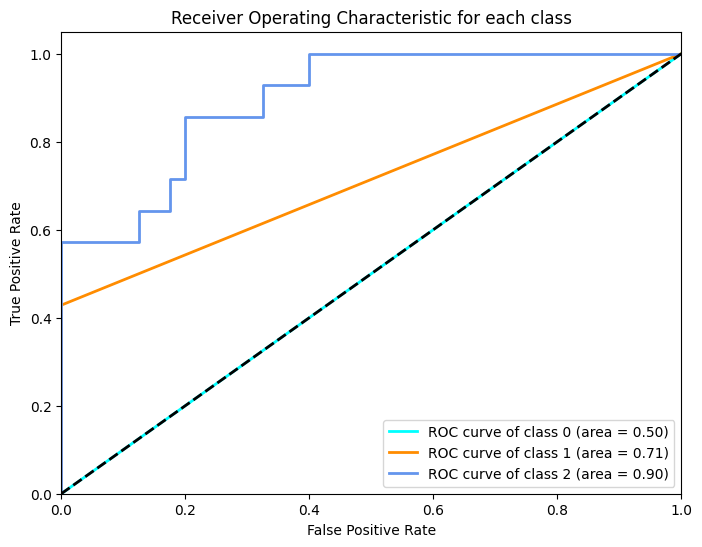

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming X_test and y_test are your test data and labels
# Replace X_test and y_test with your actual test data

# Binarize the output
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize OneVsRestClassifier with LogisticRegression
model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
model.fit(X_train, y_train_binarized)
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()


#**Well Done :)**
Now let's practice!